# 1. Import Libraries

In [1]:
# Import the Required Libraries
import numpy as np
import random

# Import sklearn Libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import the Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import the HyperparameterOptimizer Library
from hyperparameter_optimizer import HyperparameterOptimizer as HO

# 2. Hyperparameter Optimizer - Classification Example

In [2]:
# Set the Random Seed
random.seed(0)
np.random.seed(0)

## 2.1. Load the Dataset - Cancer Dataset

In [3]:
# Import the SVC Library
from sklearn.svm import SVC

# Load the Data
cancer = datasets.load_breast_cancer()
cancer_features, cancer_target = cancer.data, cancer.target

# Split the Data into Training and Testing Sets
cancer_features_train, cancer_features_test, cancer_target_train, cancer_target_test = train_test_split(cancer_features, cancer_target, test_size=0.2, random_state=0)

## 2.2. Create the Pipeline

In [4]:
# Create a Pipeline to Standardize and Run SVC
svc_steps = [("scaler", MinMaxScaler()), ("svm", SVC())]
svc_pipeline = Pipeline(svc_steps)

## 2.3. Prepare for Hyperparameter Optimization

In [6]:
# Create a Parameters Dictionary - no need to specify hyperparameter values
svc_params = {
                'svm__C': [],
                'svm__gamma': [],
                'svm__kernel': []
            }

# Create an Instance of the HyperparameterOptimizer Class
G = HO(svc_pipeline, svc_params, "accuracy")

# Optimize the Hyperparameters
y = G.optimizePS(
                                cancer_features_train,                                                                      # Training Features
                                cancer_target_train,                                                                        # Training Target
                                bounds=[(0.00001, 5000.00), (0.00001, 5000.00),['linear', 'poly', 'rbf', 'sigmoid']],       # Bounds for C, gamma, and kernel
                                mesh_size_coeff=0.6,                                                                        # Mesh Size Coefficient
                                acc_coeff=1,                                                                                # Acceleration Coefficient
                                contr_coeff=0.5,                                                                            # Contraction Coefficient
                                search_method="gps",                                                                        # Search Method
                                min_mesh_ratio=0.001,                                                                       # Mesh Size Ratio
                                maxIter=25                                                                                  # Maximum Number of Iterations
                            )

Pattern Search hyperparameter optimization has started . . .
Initializing Pattern Search . . .
Starting Optimization Main Loop . . .
Iteration #1
Corresponding Optimal Solution: 0.9604395604395604
Corresponding Optimum: [4289.728089534327 4236.258695448109 'linear']
------
Iteration #2
Corresponding Optimal Solution: 0.9626373626373625
Corresponding Optimum: [5000.0 4236.258695448109 'linear']
------
Iteration #3
Corresponding Optimal Solution: 0.9626373626373625
Corresponding Optimum: [5000.0 4236.258695448109 'linear']
------
Iteration #4
Corresponding Optimal Solution: 0.9648351648351647
Corresponding Optimum: [3500.0 4236.258695448109 'linear']
------
Iteration #5
Corresponding Optimal Solution: 0.9648351648351647
Corresponding Optimum: [3500.0 4236.258695448109 'linear']
------
Iteration #6
Corresponding Optimal Solution: 0.9648351648351647
Corresponding Optimum: [3500.0 4236.258695448109 'linear']
------
Iteration #7
Corresponding Optimal Solution: 0.9648351648351647
Correspondin

## 2.4. Plot the Results 

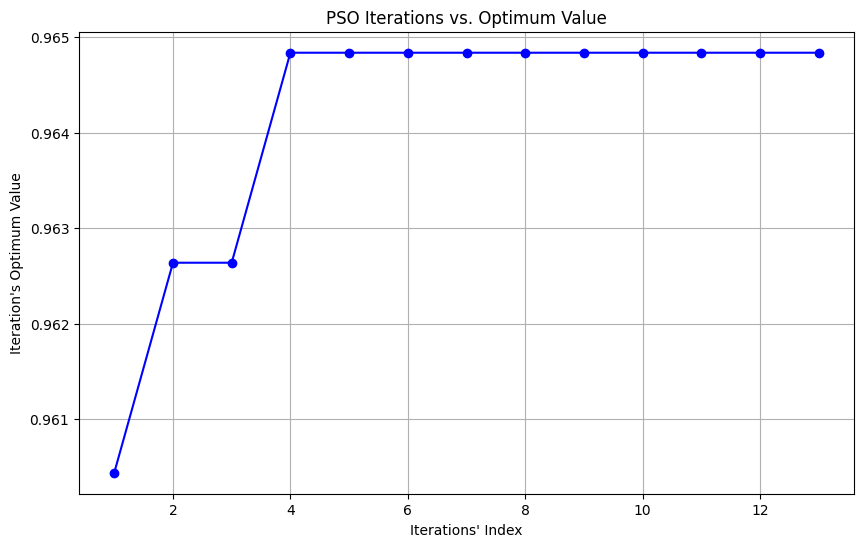

In [7]:
def plot_ps_iter_opt_sols(ps_iter_opt_sols):
    iterations_index = ps_iter_opt_sols["Iterations' Index"]
    iterations_optimum_value = ps_iter_opt_sols["Iteration's Optimum Value"]

    plt.figure(figsize=(10, 6))
    plt.plot(iterations_index, iterations_optimum_value, marker='o', linestyle='-', color='b')
    plt.title("PS Iterations vs. Optimum Value")
    plt.xlabel("Iterations' Index")
    plt.ylabel("Iteration's Optimum Value")
    plt.grid(True)
    plt.show()

plot_ps_iter_opt_sols(G.PATS_iterOptSols)

## 2.5. Print the Results

In [8]:
# Access the Algorithm's Attributes
print(G.PS_attritbutes)

{'Mesh Size Coefficient': 0.6, 'Acceleration Coefficient': 1, 'Contraction Coefficient': 0.5, 'Search Method': 'gps'}


In [9]:
# Access the Iterations' Optimum Solutions History
print(G.PS_iterOptSols)

{"Iterations' Index": array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]), "Iteration's Optimum Value": [np.float64(0.9604395604395604), np.float64(0.9626373626373625), np.float64(0.9626373626373625), np.float64(0.9648351648351647), np.float64(0.9648351648351647), np.float64(0.9648351648351647), np.float64(0.9648351648351647), np.float64(0.9648351648351647), np.float64(0.9648351648351647), np.float64(0.9648351648351647), np.float64(0.9648351648351647), np.float64(0.9648351648351647), np.float64(0.9648351648351647)]}


In [10]:
# Access the Final Optimal Solution
print(G.PS_finalOptimalSol)

{"Optimal Solution Variables' Values": array([3500.0, 4236.258695448109, 'linear'], dtype=object), 'Optimal Solution Value': np.float64(0.9648351648351647)}


## 2.6. Train the Model
The model is trained using the optimized hyperparameter values.

In [11]:
# Get the Optimal Hyperparameter Values
C_optimal = G.PS_finalOptimalSol["Optimal Solution Variables' Values"][0]
gamma_optimal = G.PS_finalOptimalSol["Optimal Solution Variables' Values"][1]
kernel_optimal = G.PS_finalOptimalSol["Optimal Solution Variables' Values"][2]

# Create a Pipeline with the Optimal Hyperparameters
svc_steps = [("scaler", MinMaxScaler()), ("svm", SVC(C=C_optimal, gamma=gamma_optimal, kernel=kernel_optimal))]
svc_pipeline = Pipeline(svc_steps)

# Train the Pipeline
svc_pipeline.fit(cancer_features_train, cancer_target_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svm',
                 SVC(C=3500.0, gamma=4236.258695448109, kernel='linear'))])

## 2.7. Test the Results

In [12]:
# Import the Required Libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict the Target Values
cancer_y_pred = svc_pipeline.predict(cancer_features_test)

### 2.7.1. Accuracy

In [13]:
# Calculate the Accuracy
cancer_accuracy = accuracy_score(cancer_target_test, cancer_y_pred)
print(f"Accuracy: {cancer_accuracy:.2f}")

Accuracy: 0.96


### 2.7.2. Confusion Matrix

In [14]:
# Calculate the Confusion Matrix
conf_matrix = confusion_matrix(cancer_target_test, cancer_y_pred)

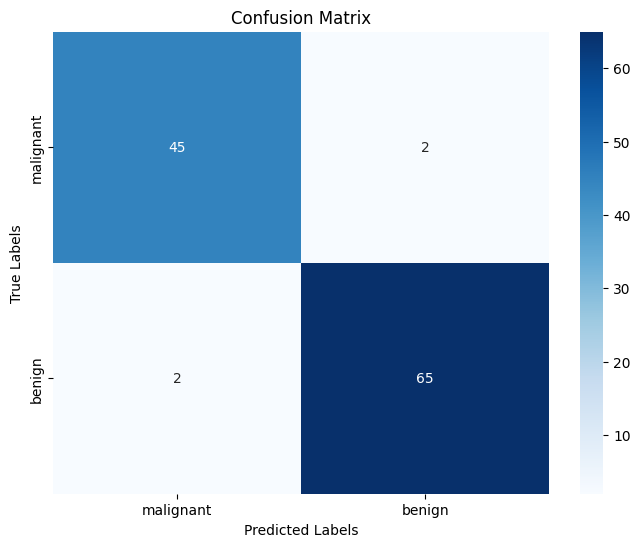

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### 2.7.3. Classification Report

In [16]:
# Classification Report
print("\nClassification Report:")
print(classification_report(cancer_target_test, cancer_y_pred, target_names=cancer.target_names))


Classification Report:
              precision    recall  f1-score   support

   malignant       0.96      0.96      0.96        47
      benign       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# 3. Hyperparameter Optimizer - Regression Example

In [17]:
# Set the Random Seed
random.seed(7)
np.random.seed(7)

## 3.1. Load the Dataset - Diabetes Dataset

In [18]:
from sklearn.datasets import load_diabetes

# Load the Data
diabetes = load_diabetes()
diabetes_features, diabetes_target = diabetes.data, diabetes.target

# Split the Data into Training and Testing Sets
diabetes_features_train, diabetes_features_test, diabetes_target_train, diabetes_target_test = train_test_split(diabetes_features, diabetes_target, test_size=0.2, random_state=0)

## 3.2. Create the Pipeline

In [19]:
# Import the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Pipeline to Standardize and Run Logistic Regression
rf_steps = [("scaler", StandardScaler()),("rfr", RandomForestRegressor(random_state=0, n_jobs=-1))]
rf_pipeline = Pipeline(rf_steps)

## 3.3. Prepare for Hyperparameter Optimization

In [25]:
# Create a Parameters Dictionary
rf_params = {"rfr__max_features": [],
            "rfr__max_depth": [],
            "rfr__min_samples_split": [],
            "rfr__min_samples_leaf": [],
            "rfr__n_estimators": []}


G2 = HO(rf_pipeline, rf_params, "r2")
y2 = G2.optimizePS(  
                    diabetes_features_train,                                   # Training Features
                    diabetes_target_train,                                     # Training Target
                    bounds=[(1, 10), (1, 10), (2, 20), (1, 15), (50,500)],     # Bounds for max_features, max_depth, min_samples_split, min_samples_leaf, and n_estimators
                    mesh_size_coeff=0.1,                                       # Mesh Size Coefficient
                    acc_coeff=2,                                               # Acceleration Coefficient
                    contr_coeff=1,                                             # Contraction Coefficient
                    search_method="gps",                                       # Search Method
                    min_mesh_ratio=0.001,                                      # Mesh Size Ratio
                    maxIter=25                                                 # Maximum Number of Iterations
                )

Pattern Search hyperparameter optimization has started . . .
Initializing Pattern Search . . .
Starting Optimization Main Loop . . .
Iteration #1
Corresponding Optimal Solution: 0.47776347199760283
Corresponding Optimum: [7 9 16 8 172]
------
Iteration #2
Corresponding Optimal Solution: 0.4824841284156533
Corresponding Optimum: [5 10 16 8 272]
------
Iteration #3
Corresponding Optimal Solution: 0.4824841284156533
Corresponding Optimum: [5 10 16 8 272]
------
Iteration #4
Corresponding Optimal Solution: 0.4824841284156533
Corresponding Optimum: [5 10 16 8 272]
------
Iteration #5
Corresponding Optimal Solution: 0.4824841284156533
Corresponding Optimum: [5 10 16 8 272]
------
Iteration #6
Corresponding Optimal Solution: 0.4824841284156533
Corresponding Optimum: [5 10 16 8 272]
------
Iteration #7
Corresponding Optimal Solution: 0.4824841284156533
Corresponding Optimum: [5 10 16 8 272]
------
Iteration #8
Corresponding Optimal Solution: 0.4824841284156533
Corresponding Optimum: [5 10 16 8

## 3.4. Plot the Results

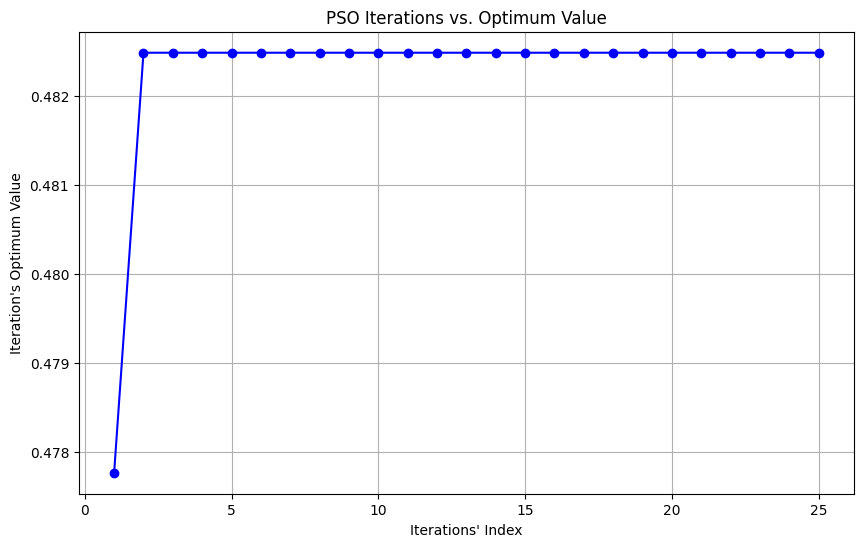

In [26]:
def plot_ps_iter_opt_sols(ps_iter_opt_sols):
    iterations_index = ps_iter_opt_sols["Iterations' Index"]
    iterations_optimum_value = ps_iter_opt_sols["Iteration's Optimum Value"]

    plt.figure(figsize=(10, 6))
    plt.plot(iterations_index, iterations_optimum_value, marker='o', linestyle='-', color='b')
    plt.title("PS Iterations vs. Optimum Value")
    plt.xlabel("Iterations' Index")
    plt.ylabel("Iteration's Optimum Value")
    plt.grid(True)
    plt.show()

plot_ps_iter_opt_sols(G2.PS_iterOptSols)

## 3.5. Print the Results

In [27]:
print(G2.PS_attritbutes)

{'Mesh Size Coefficient': 0.1, 'Acceleration Coefficient': 2, 'Contraction Coefficient': 1, 'Search Method': 'gps'}


In [28]:
print(G2.PS_iterOptSols)

{"Iterations' Index": array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25]), "Iteration's Optimum Value": [np.float64(0.47776347199760283), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533), np.float64(0.4824841284156533)]}


In [29]:
print(G2.PS_finalOptimalSol)

{"Optimal Solution Variables' Values": array([5, 10, 16, 8, 272], dtype=object), 'Optimal Solution Value': np.float64(0.4824841284156533)}


## 3.6. Train the Model
The model is trained using the optimized hyperparameter values.

In [30]:
# Get the Optimal Hyperparameter Values
max_features_optimal = G2.PS_finalOptimalSol["Optimal Solution Variables' Values"][0]
max_depth_optimal = G2.PS_finalOptimalSol["Optimal Solution Variables' Values"][1]
min_samples_split_optimal = G2.PS_finalOptimalSol["Optimal Solution Variables' Values"][2]
min_samples_leaf_optimal = G2.PS_finalOptimalSol["Optimal Solution Variables' Values"][3]
n_estimators_optimal = G2.PS_finalOptimalSol["Optimal Solution Variables' Values"][4]

# Create a Pipeline with the Optimal Hyperparameters
rf_steps = [("scaler", StandardScaler()),("rfr", RandomForestRegressor(random_state=0, n_jobs=-1, 
                                                                      max_features=max_features_optimal, 
                                                                      max_depth=max_depth_optimal, 
                                                                      min_samples_split=min_samples_split_optimal, 
                                                                      min_samples_leaf=min_samples_leaf_optimal, 
                                                                      n_estimators=n_estimators_optimal))]
rf_pipeline = Pipeline(rf_steps)

# Train the Pipeline
rf_pipeline.fit(diabetes_features_train, diabetes_target_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr',
                 RandomForestRegressor(max_depth=10, max_features=5,
                                       min_samples_leaf=8, min_samples_split=16,
                                       n_estimators=272, n_jobs=-1,
                                       random_state=0))])

## 3.7. Test the Results

In [31]:
# Import the Required Libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict the Target Values
diabetes_y_pred = rf_pipeline.predict(diabetes_features_test)

In [32]:
# Calculate Evaluation Metrics
mse = mean_squared_error(diabetes_target_test, diabetes_y_pred)
mae = mean_absolute_error(diabetes_target_test, diabetes_y_pred)
r2 = r2_score(diabetes_target_test, diabetes_y_pred)

# Print Results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 3506.06
Mean Absolute Error (MAE): 46.25
R² Score: 0.32
